[000000.01] [0/1] 10-16 17:17  Chain                     INFO     Loading ./sampler_result/fiducial/chain_FOLPSRC_1%CATAS_V100_z1.0.npy.
[000000.29] [0/1] 10-16 17:17  Chain                     INFO     Loading ./sampler_result/fiducial/chain_FOLPS_1%CATAS_V100_z1.0.npy.
Removed no burn in
Removed no burn in


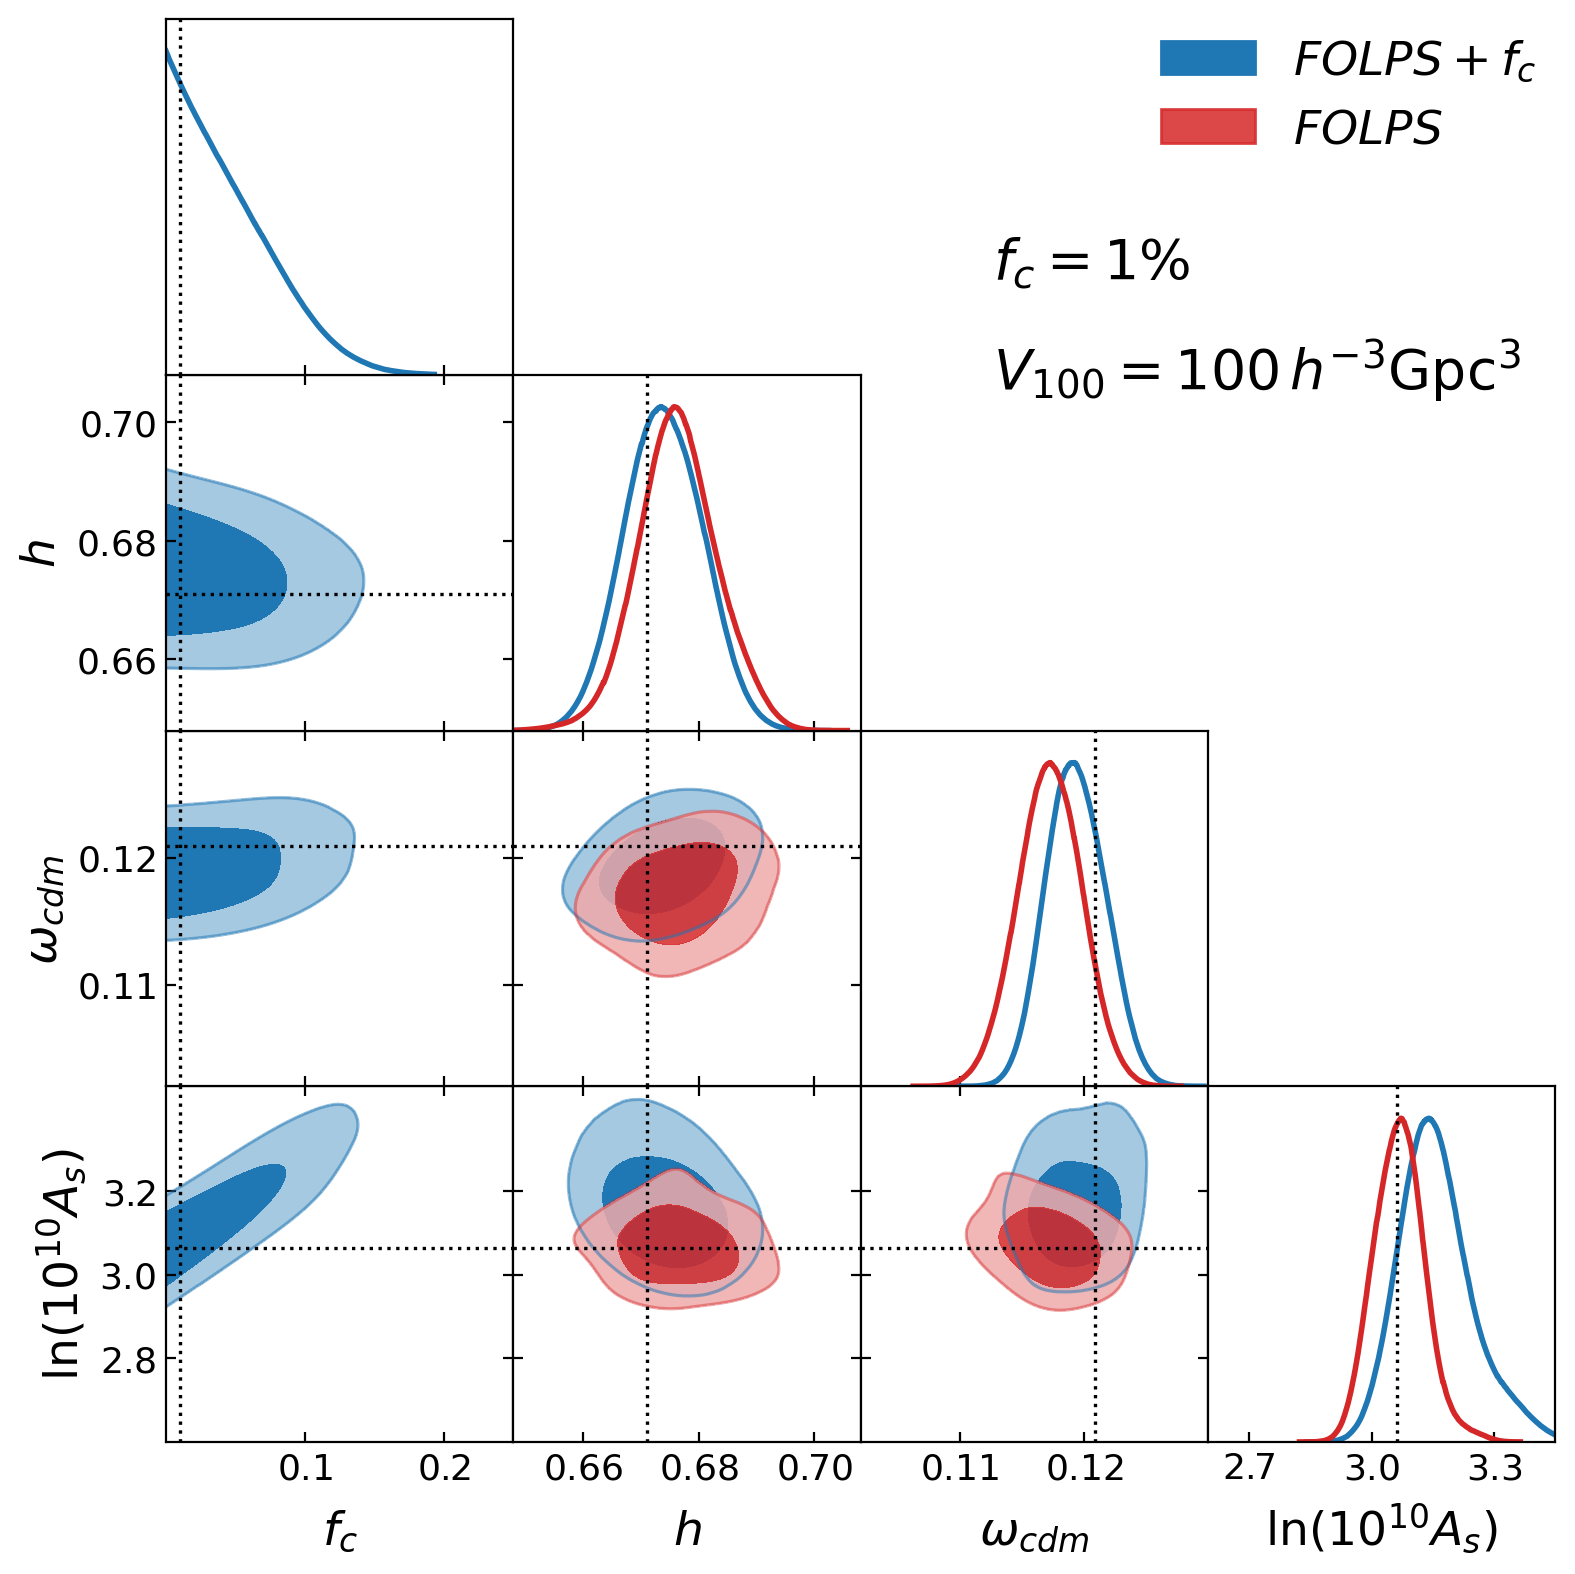

In [27]:
import numpy as np
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib import pyplot as plt
from getdist import plots
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from cosmoprimo.fiducial import DESI
from desilike.observables.galaxy_clustering import TracerPowerSpectrumMultipolesObservable
from desilike.likelihoods import ObservablesGaussianLikelihood
from desilike.samples import Profiles, plotting, Chain
from desilike import setup_logging
setup_logging()  # for logging messages

redshift = 1.0
catalogue = 'fiducial'
cosmology = 'fiducial'
model = 'FOLPS'
CovRsf = 100
r_pks = ['RSD','1%CATAS','5%CATAS']
params= ['fc','h','omega_cdm','logA']
# fc = 0.01

if cosmology == 'fiducial':
    # param_limits = {'h':[0.648,0.705],'omega_cdm':[0.105,0.134],'logA':[2.65,3.75]}
    if CovRsf ==25:
        param_limits = {'h':[0.632,0.722],'omega_cdm':[0.095,0.135],'logA':[2.5,3.6]}
    if CovRsf ==100:
        param_limits = {'h':[0.648,0.708],'omega_cdm':[0.102,0.13],'logA':[2.6,3.45], 'fc':[0, 0.25]}
    # if model == 'FOLPSRC':
    #     params= ['fc','h','omega_cdm','logA']
    colors      = ['C0', 'C3', 'C4']
elif cosmology == 'Mnu_p':
    params = ['m_ncdm']+params
    param_limits = {'h':[0.638,0.70],'omega_cdm':[0.105,0.134],'omega_b':[0.0206,0.0244],'logA':[2.66,3.8], 'm_ncdm':[0,0.58]}
    colors      = ['C6', 'C3', 'C4']
elif cosmology == 'nsCDM':
    params = ['n_s']+params
    param_limits = {'h':[0.648,0.702],'omega_cdm':[0.092,0.14],'omega_b':[0.0206,0.0244],'logA':[2.66,3.85], 'ns':[0.9,1.1]}
    colors      = ['C8', 'C3', 'C4']
elif cosmology == 'wCDM':
    params = ['w0_fld']+params
    param_limits = {'h':[0.59,0.74],'omega_cdm':[0.102,0.130],'logA':[2.56,3.9], 'w0_fld':[-1.35,-0.6]}
    colors      = ['C9', 'C3', 'C4']

burnin      = 0.80
slice_step  = 1000

colors      =  ['C0','C3','C4']
lss         = ['-', '-', '-']
filleds     = [True, True, True]
lws         = [2.0, 2.0, 2.0]

# lws         = [2.0, 2.0]
# lss          = ['-', '-']
# filleds      = [True, True]
# colors      = ['C0', 'C3']

samples = []
# for r_pk in [f'{int(fc*100)}%CATAS']:
    # for model in ['FOLPSRC','FOLPS']:

# for r_pk in r_pks:
#     chain_fn    = f'./sampler_result/{cosmology}/chain_{model}_{r_pk}_V{CovRsf}_z{redshift}.npy'
#     print(chain_fn)
#     chain       = Chain.load(chain_fn).remove_burnin(burnin)[::slice_step]
#     # print(chain.to_stats(tablefmt='pretty'))
#     samples.append(chain)
    
chain_fn    = f'./sampler_result/{cosmology}/chain_FOLPSRC_1%CATAS_V{CovRsf}_z{redshift}.npy'
chain = Chain.load(chain_fn).remove_burnin(burnin)[::slice_step]
samples.append(chain)

chain_fn    = f'./sampler_result/{cosmology}/chain_FOLPS_1%CATAS_V{CovRsf}_z{redshift}.npy'
chain = Chain.load(chain_fn).remove_burnin(burnin)[::slice_step]
samples.append(chain)

g = plots.get_subplot_plotter()
g.settings.fig_width_inch= 8
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.settings.axes_fontsize = 16
g.settings.figure_legend_frame = False

# plotting.plot_triangle(samples, params= extra_param, filled = filleds, legend_labels = [],
#                     contour_ls = lss, contour_lws = lws, contour_colors = colors, param_limits=param_limits, g=g)
# g.export()
def plot_cosparams():
    plotting.plot_triangle(samples, title_limit=0, filled = filleds, params = params,
                               legend_labels = [r'$FOLPS+f_c$', r'$FOLPS$'], legend_loc= 'upper right',
                            #    legend_labels = [r'clean', r'1% catas', r'5% catas'], legend_loc= 'upper right',
                                # legend_labels=[],
                                contour_ls = lss, contour_lws = lws, contour_colors = colors, 
                                param_limits=param_limits, 
                                smoothed=True, g=g)
    def set_true_values(catalogue, params):
        update_values = {
            'fiducial': {'h': 0.6711, 'omega_cdm': 0.1209, 'Omega_cdm': 0.2685, 'omega_b':0.02207,'logA': 3.0631, 'm_ncdm': 0.0, 'n_s':0.9624, 'w0_fld':-1.0, 'fc':0.01},
            'Mnu_p': {'h': 0.6711, 'omega_cdm': 0.1198, 'Omega_cdm': 0.2661, 'omega_b':0.02207,'logA': 3.1247, 'm_ncdm': 0.1, 'n_s':0.9624, 'w0_fld':-1.0},
            'Mnu_ppp': {'h': 0.6711, 'omega_cdm': 0.1166, 'Omega_cdm': 0.2590, 'omega_b':0.02207,'logA': 3.3113, 'm_ncdm': 0.4, 'n_s':0.9624, 'w0_fld':-1.0}
        }
        if catalogue in update_values:
            truth_values = update_values[catalogue]
        return [truth_values[param] for param in params if param in truth_values]
    true_values = set_true_values(catalogue, params)
    for i in range(len(true_values)):
        for j in range(i+1):
            g.subplots[i,j].axvline(true_values[j], c = 'k', ls = ':', lw = 1.2)
            if i != j:
                g.subplots[i,j].axhline(true_values[i], c = 'k', ls = ':', lw = 1.2)
                
plot_cosparams()
plt.figtext(0.63, 0.82, r'$f_c = 1\%$', fontsize=20)
plt.figtext(0.63, 0.75, r'$V_{100} = 100 \, h^{-3} \rm{Gpc}^3$', fontsize=20)
# plt.figtext(0.62, 0.7, r'$k \in [0.02,0.2] \, h/\rm{Gpc}$', fontsize=20)
# axs[0].set_ylim([10**(-5),10**4])
# patch2 = mpatches.Patch(color='C3', label=r'{}% catas & FOLPS'.format(int(fc*100)))
# patch1 = mpatches.Patch(color='C0', label=r'{}% catas & FOLPS+$f_c$'.format(int(fc*100)))
# leg1 = plt.legend(handles=[patch2, patch1], fontsize = 20)
# leg1.get_frame().set_linewidth(0.0)
g.export(dpi=1000)

[000792.16] [0/1] 07-09 12:16  Chain                     INFO     Loading ./sampler_result/fiducial/chain_FOLPSRC_RSD_V100_z1.0.npy.


[000792.31] [0/1] 07-09 12:16  Chain                     INFO     Loading ./sampler_result/fiducial/chain_FOLPS_RSD_V100_z1.0.npy.
Removed no burn in
Removed no burn in


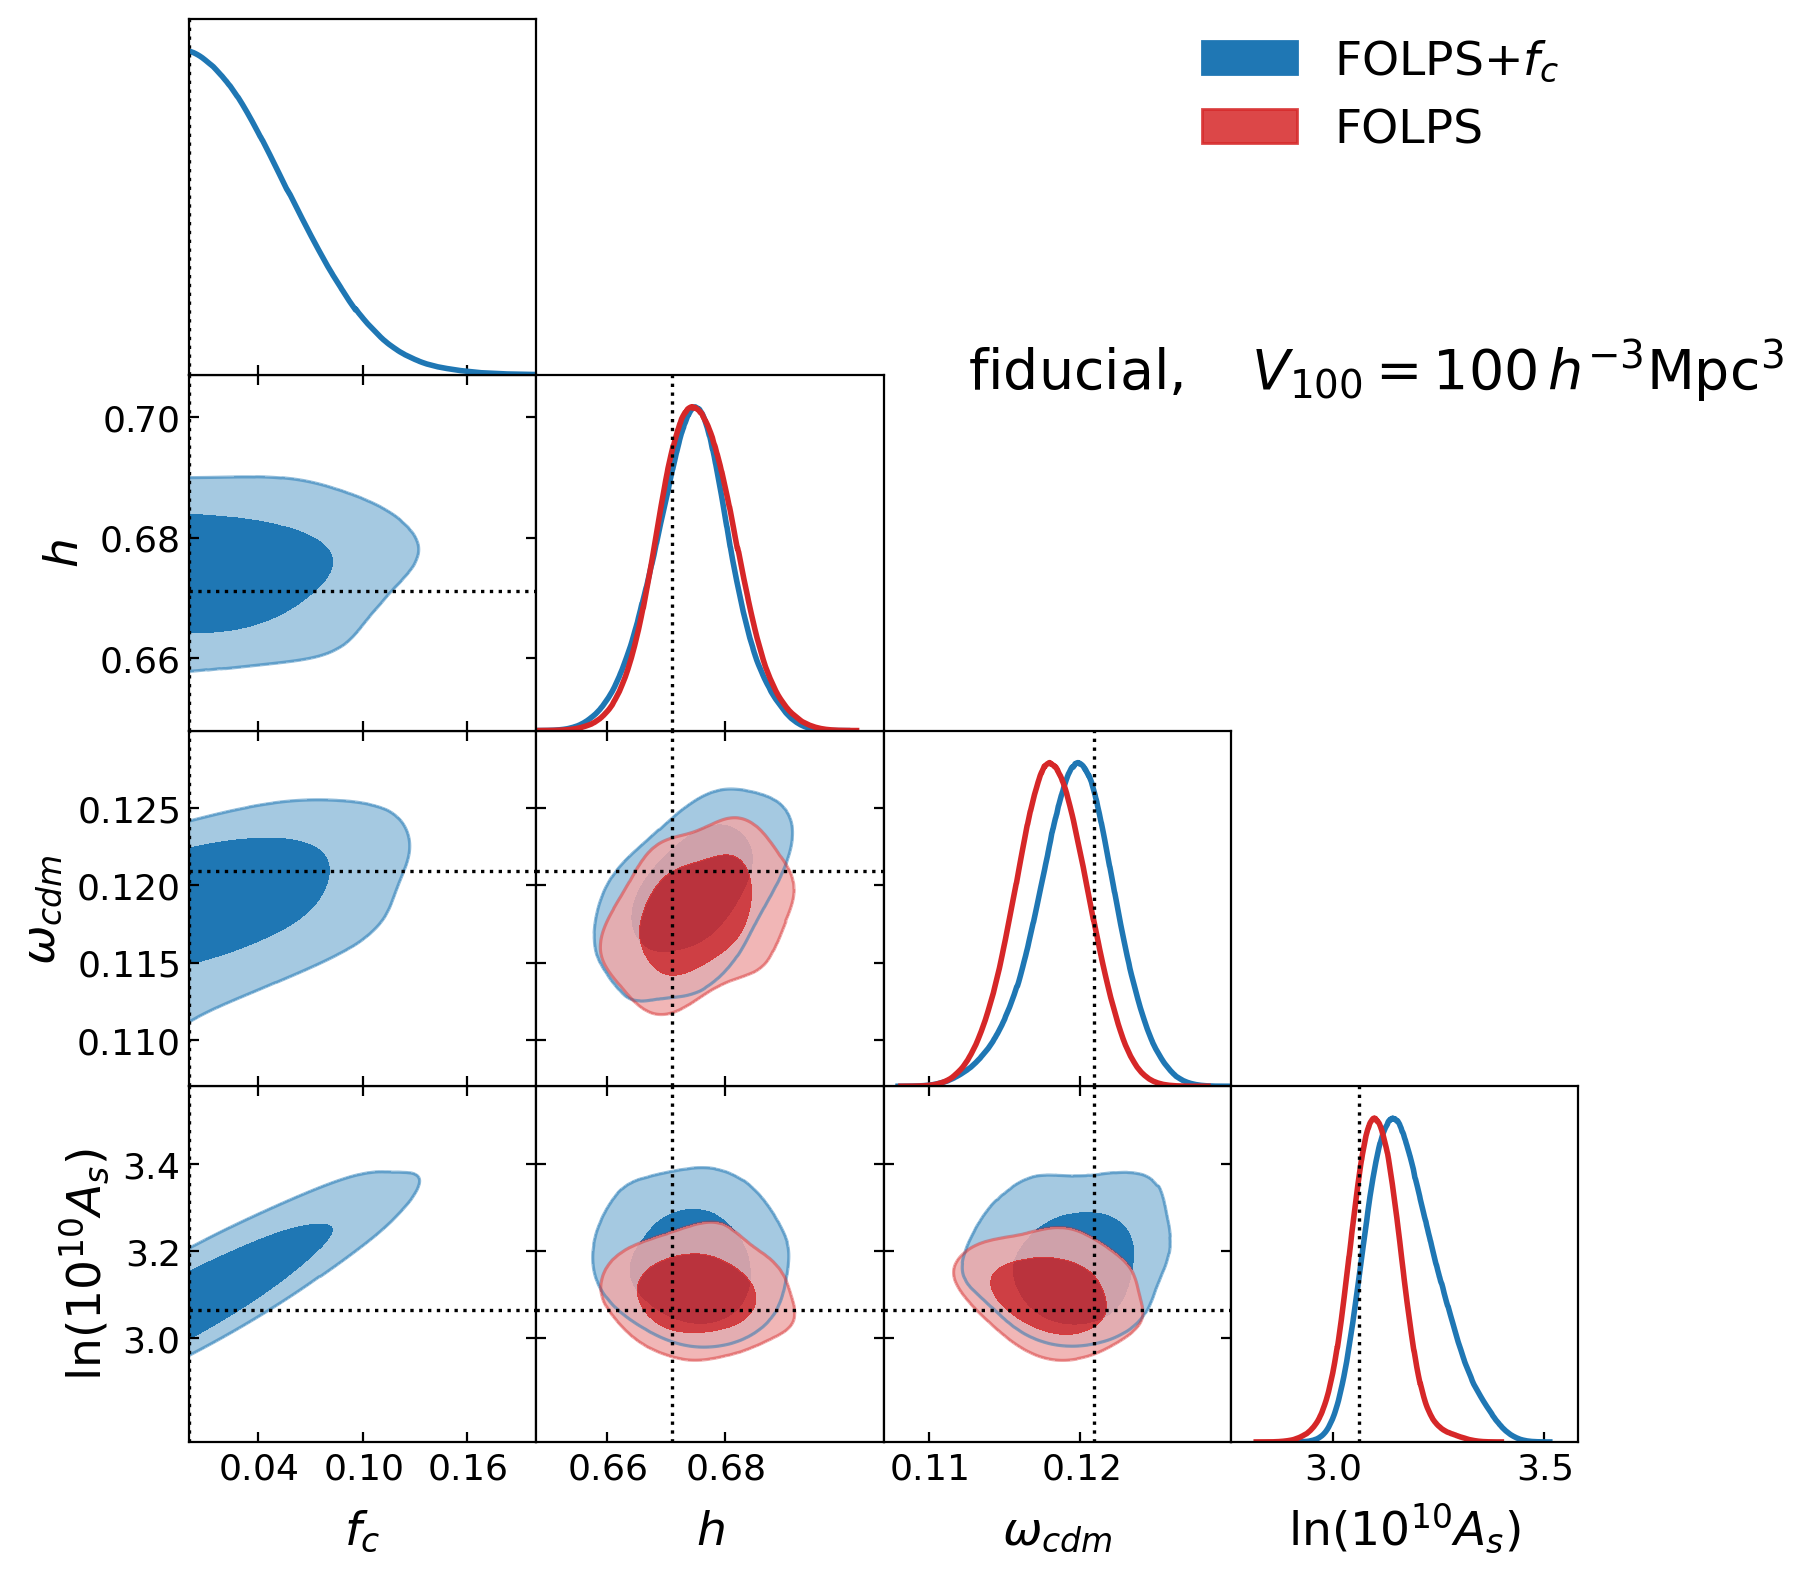

In [26]:
redshift = 1.0
CovRsf = 100
r_pk = 'RSD'
params= ['fc','h', 'omega_cdm', 'logA']
fc = 0.0
#
burnin      = 0.8
slice_step  = 1200

colors      = ['C0','C3']
lws         = [2.0, 2.0]
lss          = ['-', '-']
filleds      = [True, True]

samples = []
for model in ['FOLPSRC','FOLPS']:
    chain_fn    = f'./sampler_result/{catalogue}/chain_{model}_{r_pk}_V{CovRsf}_z{redshift}.npy'
    chain       = Chain.load(chain_fn).remove_burnin(burnin)[::slice_step]
    # print(chain.to_stats(tablefmt='pretty'))
    samples.append(chain)

# param_limits = {'h':[0.648,0.708],'omega_cdm':[0.102,0.13],'logA':[2.6,3.63], 'fc':[0,0.26]}
param_limits = {'h':[0.648,0.707],'omega_cdm':[0.107,0.13],'logA':[2.76,3.58], 'fc':[0,0.20]}


# for parameter in ['h','omega_cdm','logA']:
g = plots.get_subplot_plotter()
g.settings.fig_width_inch= 8
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.settings.axes_fontsize = 16
g.settings.figure_legend_frame = False
g = plotting.plot_triangle(samples, params = params,                                 
                           legend_labels = [r'FOLPS+$f_c$', r'FOLPS'], legend_loc= 'upper right',
                        filled = filleds, contour_ls = lss, contour_lws = lws, contour_colors = colors, 
                        param_limits=param_limits, g=g,
                        )

def set_true_values(catalogue, params):
    update_values = {
        'fiducial': {'h': 0.6711, 'omega_cdm': 0.1209, 'Omega_cdm': 0.2685, 'omega_b':0.02207,'logA': 3.0631, 'm_ncdm': 0.0, 'n_s':0.9624, 'w0_fld':-1.0,'fc':fc},
        'Mnu_p': {'h': 0.6711, 'omega_cdm': 0.1198, 'Omega_cdm': 0.2661, 'omega_b':0.02207,'logA': 3.1247, 'm_ncdm': 0.1, 'n_s':0.9624, 'w0_fld':-1.0},
        'Mnu_ppp': {'h': 0.6711, 'omega_cdm': 0.1166, 'Omega_cdm': 0.2590, 'omega_b':0.02207,'logA': 3.3113, 'm_ncdm': 0.4, 'n_s':0.9624, 'w0_fld':-1.0}
    }
    if catalogue in update_values:
        truth_values = update_values[catalogue]
    return [truth_values[param] for param in params if param in truth_values]
true_values = set_true_values(catalogue, params)
for i in range(len(true_values)):
    for j in range(i+1):
        g.subplots[i,j].axvline(true_values[j], c = 'k', ls = ':', lw = 1.2)
        if i != j:
            g.subplots[i,j].axhline(true_values[i], c = 'k', ls = ':', lw = 1.2)

plt.figtext(0.60, 0.75, r'$\text{fiducial}, \quad V_{100} = 100 \, h^{-3} \rm{Gpc}^3$', fontsize=20)
g.export(dpi=1000)

[000572.42] [0/1] 06-20 17:44  Chain                     INFO     Loading ./sampler_result/Mnu_p/chain_FOLPSRC_1%CATAS_V100_z1.0.npy.


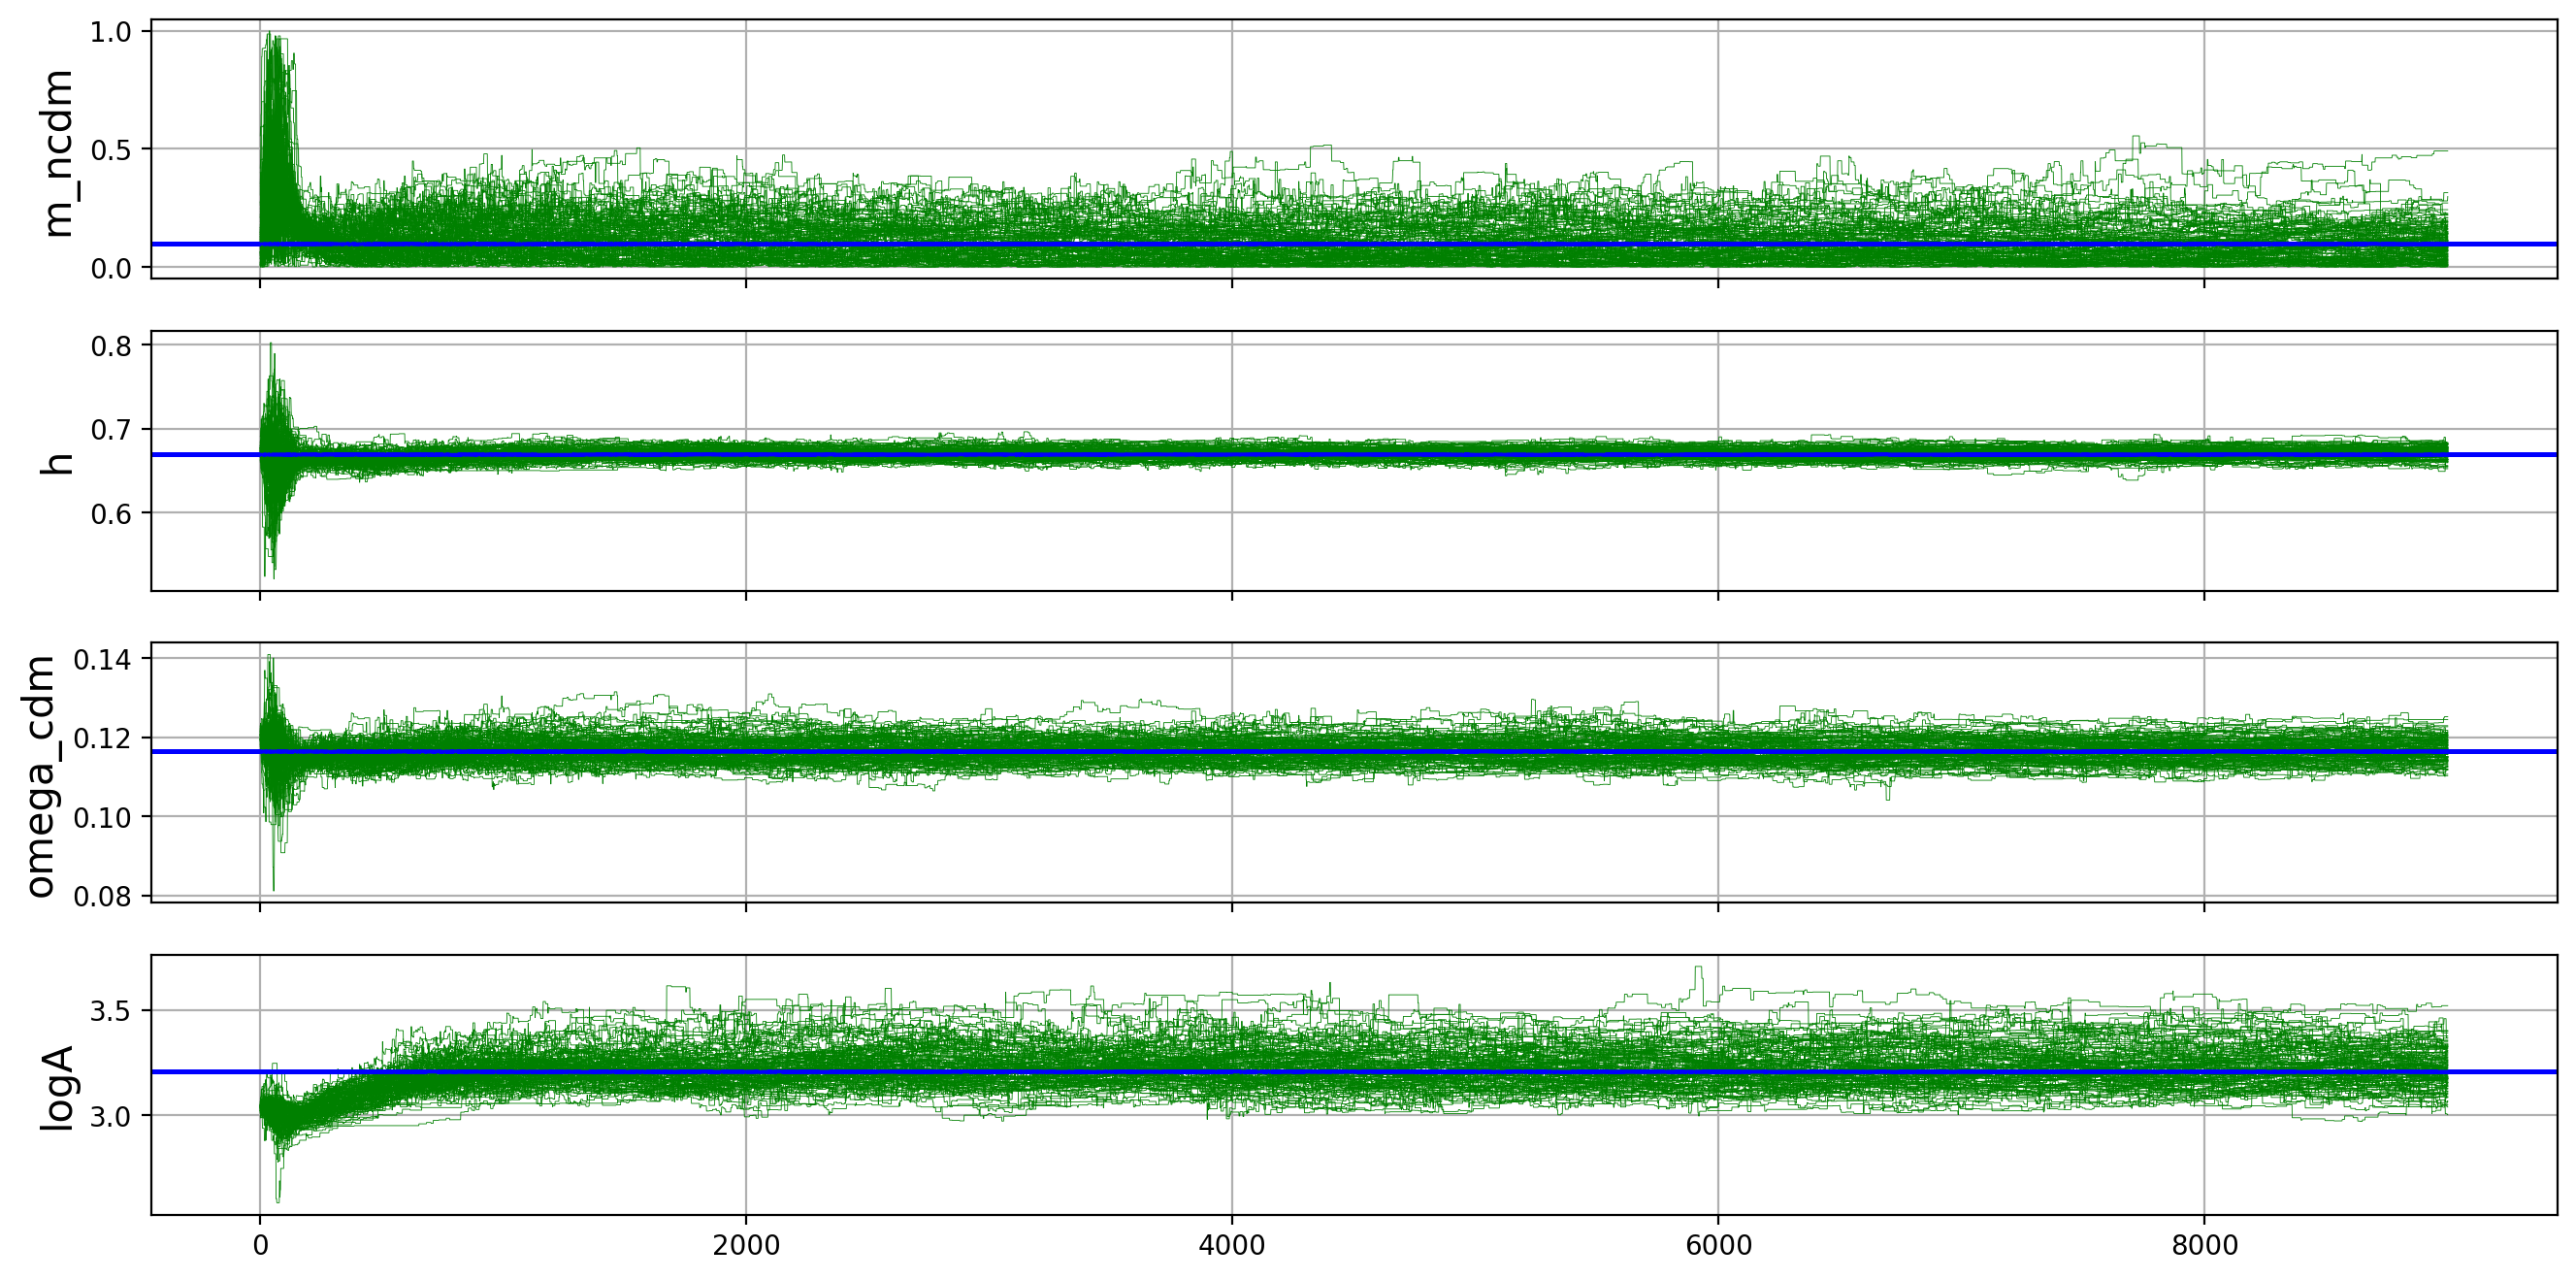

In [12]:
import numpy as np
redshift =1.0
model = 'FOLPSRC'
r_pk = '1%CATAS'
CovRsf = 100
params= ['m_ncdm','h', 'omega_cdm', 'logA']
ndim            = len(params)
burnin      = 0.0
slice_step  = 1
nwalkers = 120

chain_fn    = f'./sampler_result/{catalogue}/chain_{model}_{r_pk}_V{CovRsf}_z{redshift}.npy'
chain       = Chain.load(chain_fn).remove_burnin(burnin)[::slice_step]
chain_samples   = dict(zip(chain.basenames(), chain.data))
samples         = np.array([chain_samples[p] for p in params])
medians         = np.array(chain.median(params=params))
fig, ax = plt.subplots(ndim, sharex=True, figsize=(16, 2 * ndim))
for i in range(nwalkers):
    for j in range(ndim):
        ax[j].plot(samples[j, :, i], c = 'green', lw=0.3)
        ax[j].set_ylabel(params[j], fontsize=15)
        ax[j].grid(True)
        ax[j].axhline(medians[j], c='blue', lw=1.2)